In [114]:
import pg8000

# Connect to PostgreSQL
conn = pg8000.connect(
    host="localhost", 
    database="crime1",  
    user="postgres",  
    password="King@123",  
    port="5432"
)

# Create a cursor and execute query
cursor = conn.cursor()
cursor.execute("SELECT * FROM crime_data")

# Fetch and print the results
rows = cursor.fetchall()
for row in rows:
    print(row)



[1001, 'Burglary', 'Shenzhen', datetime.date(2024, 1, 1), datetime.time(0, 0), 63, 30, 'Unknown', Decimal('27.490800'), Decimal('103.702700')]
[1002, 'Fraud', 'Wuhan', datetime.date(2024, 1, 1), datetime.time(0, 1), 47, 59, 'Unknown', Decimal('39.014290'), Decimal('110.838000')]
[1003, 'Burglary', 'Beijing', datetime.date(2024, 1, 1), datetime.time(0, 2), 57, 20, 'Unknown', Decimal('34.639880'), Decimal('117.458900')]
[1004, 'Assault', 'Chongqing', datetime.date(2024, 1, 2), datetime.time(0, 4), 35, 26, 'Knife', Decimal('31.973170'), Decimal('114.644500')]
[1005, 'Assault', 'Shenzhen', datetime.date(2024, 1, 2), datetime.time(0, 5), 68, 29, 'None', Decimal('23.120370'), Decimal('116.131200')]
[1006, 'Theft', 'Guangzhou', datetime.date(2024, 1, 2), datetime.time(0, 7), 65, 40, 'Gun', Decimal('23.119890'), Decimal('113.175700')]
[1007, 'Vandalism', 'Shenzhen', datetime.date(2024, 1, 3), datetime.time(0, 8), 19, 31, 'Knife', Decimal('21.161670'), Decimal('113.845500')]
[1008, 'Burglary', 

In [115]:
import pandas as pd
import mysql.connector
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [116]:
pip install pg8000

Note: you may need to restart the kernel to use updated packages.


In [117]:
import pandas as pd
# Get column names from the cursor
columns = [desc[0] for desc in cursor.description]

# Convert the data into a DataFrame
df = pd.DataFrame(rows, columns=columns)

# Close the cursor and connection
cursor.close()
conn.close()

df.head(10)

,crime_id,crime_type,location,date,time,victim_age,suspect_age,weapon_use,latitude,longitude
0,1001,Burglary,Shenzhen,2024-01-01,00:00:00,63,30,Unknown,27.490800,103.702700
1,1002,Fraud,Wuhan,2024-01-01,00:01:00,47,59,Unknown,39.014290,110.838000
2,1003,Burglary,Beijing,2024-01-01,00:02:00,57,20,Unknown,34.639880,117.458900
3,1004,Assault,Chongqing,2024-01-02,00:04:00,35,26,Knife,31.973170,114.644500
4,1005,Assault,Shenzhen,2024-01-02,00:05:00,68,29,None,23.120370,116.131200
5,1006,Theft,Guangzhou,2024-01-02,00:07:00,65,40,Gun,23.119890,113.175700
6,1007,Vandalism,Shenzhen,2024-01-03,00:08:00,19,31,Knife,21.161670,113.845500
7,1008,Burglary,Chongqing,2024-01-03,00:10:00,49,50,Knife,37.323520,116.983900
8,1009,Theft,Chongqing,2024-01-03,00:11:00,25,35,None,32.022300,104.993400
9,1010,Vandalism,Chongqing,2024-01-04,00:12:00,39,66,Bat,34.161450,109.788500


#preprocessing

In [118]:
df["weapon_use"]=df["weapon_use"].replace("Unknown","unspecified")

In [119]:
df.head()

,crime_id,crime_type,location,date,time,victim_age,suspect_age,weapon_use,latitude,longitude
0,1001,Burglary,Shenzhen,2024-01-01,00:00:00,63,30,unspecified,27.490800,103.702700
1,1002,Fraud,Wuhan,2024-01-01,00:01:00,47,59,unspecified,39.014290,110.838000
2,1003,Burglary,Beijing,2024-01-01,00:02:00,57,20,unspecified,34.639880,117.458900
3,1004,Assault,Chongqing,2024-01-02,00:04:00,35,26,Knife,31.973170,114.644500
4,1005,Assault,Shenzhen,2024-01-02,00:05:00,68,29,None,23.120370,116.131200


   crime_id crime_type   location        date      time  victim_age  \
0      1001   Burglary   Shenzhen  2024-01-01  00:00:00          63   
1      1002      Fraud      Wuhan  2024-01-01  00:01:00          47   
2      1003   Burglary    Beijing  2024-01-01  00:02:00          57   
3      1004    Assault  Chongqing  2024-01-02  00:04:00          35   
4      1005    Assault   Shenzhen  2024-01-02  00:05:00          68   

   suspect_age   weapon_use   latitude   longitude  
0           30  unspecified  27.490800  103.702700  
1           59  unspecified  39.014290  110.838000  
2           20  unspecified  34.639880  117.458900  
3           26        Knife  31.973170  114.644500  
4           29         None  23.120370  116.131200  


C:\Users\Abhay\AppData\Local\Temp\ipykernel_16200\3464099874.py:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


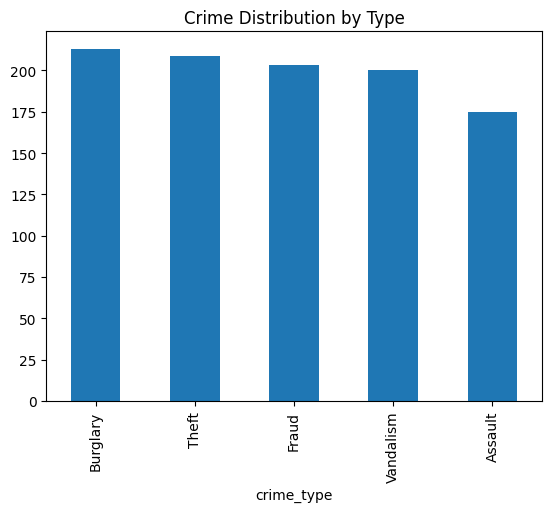

In [120]:

import matplotlib.pyplot as plt



# View first few rows
print(df.head())

# Clean the data (example: filling missing values)
df.fillna(method='ffill', inplace=True)


# Exploratory Analysis
# 1. Crime distribution by type
crime_counts = df['crime_type'].value_counts()
crime_counts.plot(kind='bar', title='Crime Distribution by Type')
plt.show()





In [121]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


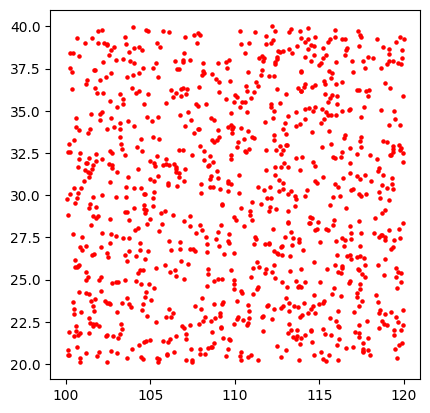

In [122]:
import geopandas as gpd

# Assuming the data contains latitude and longitude columns
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))

# Plot the incidents on a map
gdf.plot(marker='o', color='red', markersize=5)
plt.show()


In [123]:
from sklearn.cluster import KMeans

# Perform clustering on crime location data
df['coordinates'] = list(zip(df.latitude, df.longitude))
kmeans = KMeans(n_clusters=5)
df['cluster'] = kmeans.fit_predict(df[['latitude', 'longitude']])


c:\Users\Abhay\anaconda3\envs\EDA\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [124]:
# Filter for assaults
assaults = df[df['crime_type'] == 'Assault']
print(assaults)


df.fillna('unspecified', inplace=True)  # Replacing NaN values with 'unspecified'


     crime_id crime_type   location        date      time  victim_age  \
3        1004    Assault  Chongqing  2024-01-02  00:04:00          35   
4        1005    Assault   Shenzhen  2024-01-02  00:05:00          68   
13       1014    Assault    Beijing  2024-01-05  00:18:00          57   
14       1015    Assault   Shenzhen  2024-01-06  00:20:00          53   
19       1020    Assault  Guangzhou  2024-01-07  00:27:00          62   
..        ...        ...        ...         ...       ...         ...   
979      1980    Assault    Beijing  2024-12-23  23:30:00          59   
981      1982    Assault  Chongqing  2024-12-24  23:33:00          60   
984      1985    Assault   Shenzhen  2024-12-25  23:37:00          21   
985      1986    Assault  Guangzhou  2024-12-25  23:38:00          21   
997      1998    Assault  Guangzhou  2024-12-30  23:56:00          39   

     suspect_age   weapon_use   latitude   longitude              coordinates  \
3             26        Knife  31.973170  

In [125]:
df.dtypes

crime_id        int64
crime_type     object
location       object
date           object
time           object
victim_age      int64
suspect_age     int64
weapon_use     object
latitude       object
longitude      object
coordinates    object
cluster         int32
dtype: object

In [126]:
#checking ofr missing values
df.isnull().sum()

crime_id       0
crime_type     0
location       0
date           0
time           0
victim_age     0
suspect_age    0
weapon_use     0
latitude       0
longitude      0
coordinates    0
cluster        0
dtype: int64

In [127]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

          crime_id                        date   victim_age  suspect_age  \
count  1000.000000                        1000  1000.000000  1000.000000   
mean   1500.500000  2024-07-01 00:01:26.400000    43.582000    43.964000   
min    1001.000000         2024-01-01 00:00:00    18.000000    18.000000   
25%    1250.750000         2024-03-31 18:00:00    31.000000    31.000000   
50%    1500.500000         2024-07-01 00:00:00    43.000000    43.000000   
75%    1750.250000         2024-09-30 06:00:00    57.000000    57.000000   
max    2000.000000         2024-12-31 00:00:00    69.000000    69.000000   
std     288.819436                         NaN    14.778555    14.783411   

           cluster  
count  1000.000000  
mean      1.923000  
min       0.000000  
25%       1.000000  
50%       2.000000  
75%       3.000000  
max       4.000000  
std       1.434967  


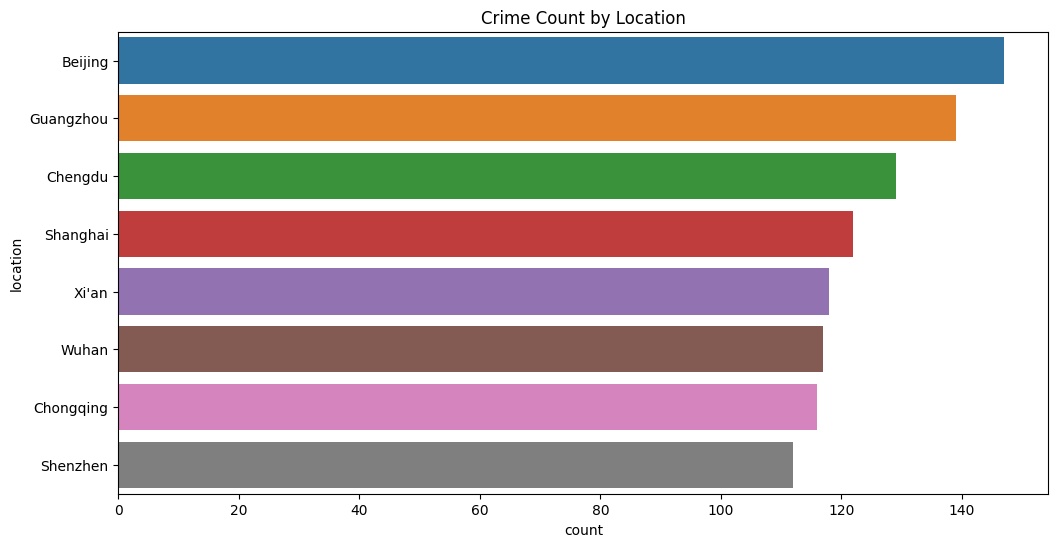

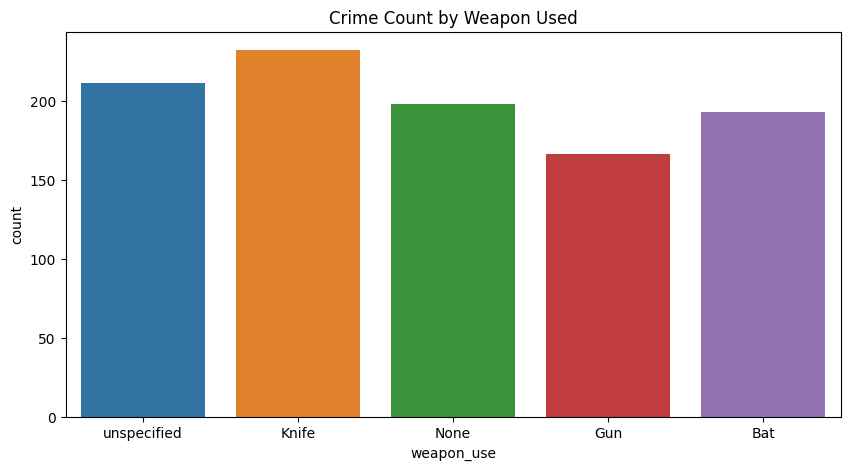

c:\Users\Abhay\anaconda3\envs\EDA\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Abhay\anaconda3\envs\EDA\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Abhay\anaconda3\envs\EDA\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


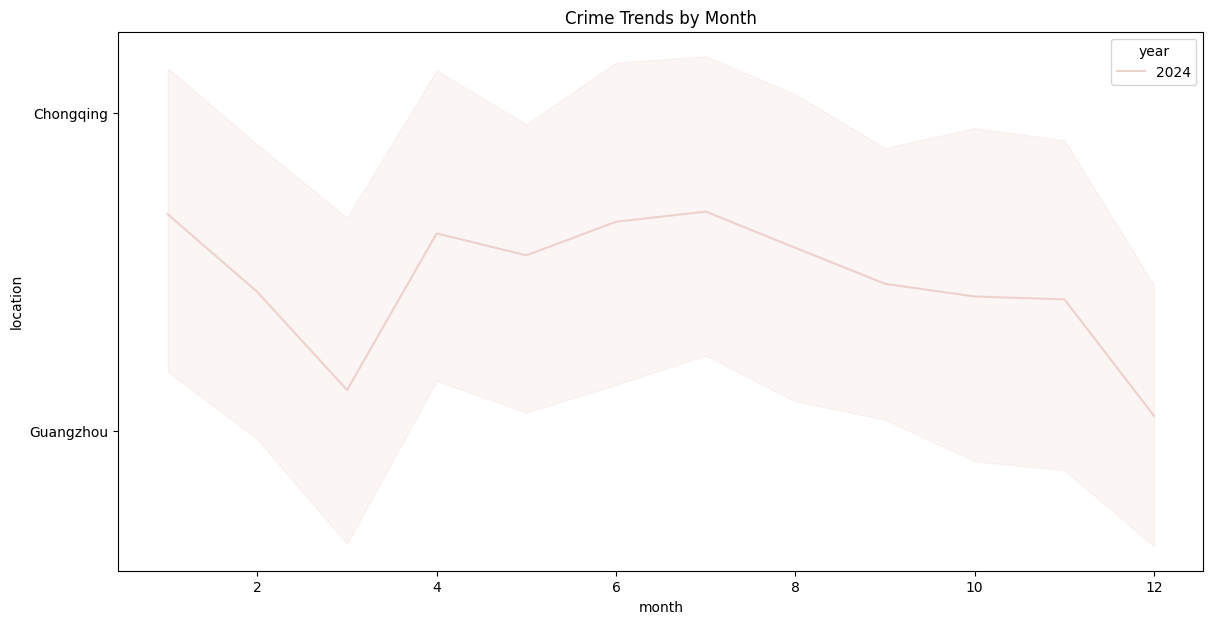

In [128]:
import seaborn as sns
# Basic statistics
print(df.describe())

# Crime count by Location
plt.figure(figsize=(12, 6))
sns.countplot(y='location', data=df, order=df['location'].value_counts().index)
plt.title('Crime Count by Location')
plt.show()

# Distribution of crime types (assuming Weapon_Used indicates crime types)
plt.figure(figsize=(10, 5))
sns.countplot(x='weapon_use', data=df)
plt.title('Crime Count by Weapon Used')
plt.show()

# Crime trends over time
plt.figure(figsize=(14, 7))
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
sns.lineplot(x='month', y='location', data=df, hue='year')
plt.title('Crime Trends by Month')
plt.show()

In [129]:
pip install folium

In [130]:
pip install fiona

Note: you may need to restart the kernel to use updated packages.


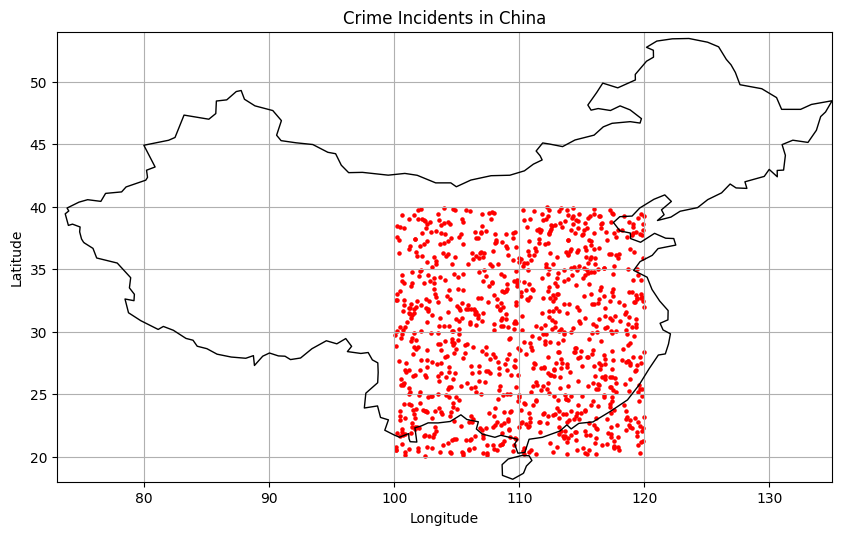

In [131]:


from shapely.geometry import Point
import folium
# Create a GeoDataFrame
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
geo_df = gpd.GeoDataFrame(df, geometry=geometry)

# Load the shapefile of the world map (ensure to specify the correct path)
shapefile_path = r"C:\Users\Abhay\Downloads\ne_110m_admin_0_countries\ne_110m_admin_0_countries.shx"
world = gpd.read_file(shapefile_path)

# Filter to get only China
china = world[world['name'] == 'China']

# Create the plot for crime incidents
fig, ax = plt.subplots(figsize=(10, 10))
china.boundary.plot(ax=ax, linewidth=1, color='black')  # Plot China boundaries
geo_df.plot(ax=ax, color='red', markersize=5)           # Plot crime incidents

# Set titles and labels
plt.title('Crime Incidents in China')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.xlim(73, 135)  # Approximate longitude bounds of China
plt.ylim(18, 54)   # Approximate latitude bounds of China
plt.grid()
plt.show()

# Create a map using folium
m = folium.Map(location=[35.0, 105.0], zoom_start=5)

# Define color mapping for different crime types
crime_colors = {
    'Theft': 'blue',
    'Assault': 'red',
    'Burglary': 'green',
    'Fraud': 'purple',
    'Vandalism': 'orange',
    # Add more crime types and colors as needed
}

# Calculate the total number of incidents
total_incidents = len(df)

# Calculate the crime rates
crime_rate = df['crime_type'].value_counts(normalize=True) * 100  # in percentage

# Add markers for each crime incident
for index, row in df.iterrows():
    crime_type = row['crime_type']
    crime_rate_value = crime_rate[crime_type] if crime_type in crime_rate else 0.0  # Default to 0 if not found
    color = crime_colors.get(crime_type, 'gray')  # Default to gray if crime type not found

    # Create a marker with a tooltip
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"crime type: {crime_type}<br>Crime Rate: {crime_rate_value:.2f}%",
        icon=folium.Icon(color=color)
    ).add_to(m)

# Save the map to an HTML file
m.save('crime_locations_map_with_rates.html')

# Display the map (if you're in a Jupyter Notebook)
m

c:\Users\Abhay\anaconda3\envs\EDA\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


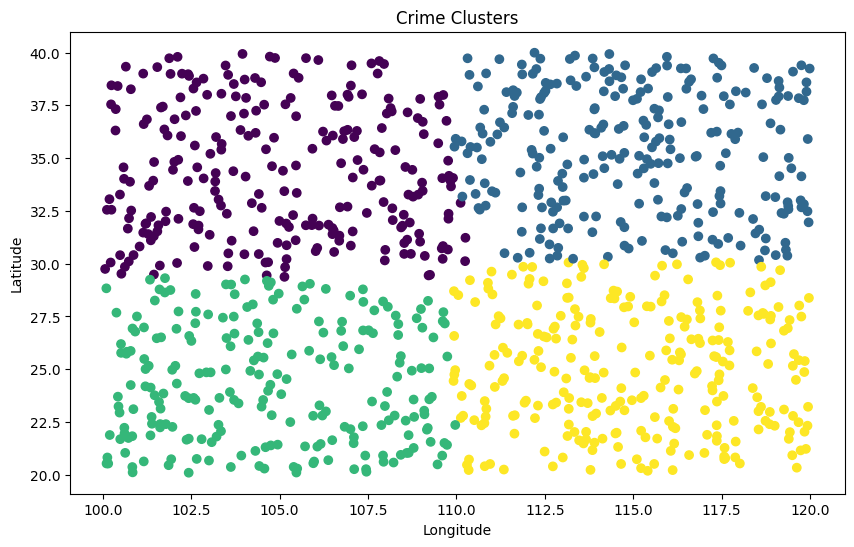

In [134]:
from sklearn.cluster import KMeans


# K-Means clustering based on location
location_data = df[['latitude', 'longitude']].values
kmeans = KMeans(n_clusters=4, random_state=0).fit(location_data)
df['cluster'] = kmeans.labels_

# Visualize clusters
plt.figure(figsize=(10, 6))
plt.scatter(df['longitude'], df['latitude'], c=df['cluster'], cmap='viridis')
plt.title('Crime Clusters')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()